# Project I - Finding the Higgs Boson

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas
import math

from helper_functions import *
from proj1_helpers import *
from implementations import *

## Loading and pre-processing the data

In [3]:
# Loading of datasets

DATA_TRAIN = '../data/train.csv'
y_train, tx_train, ids_train = load_csv_data(DATA_TRAIN)

DATA_TEST = '../data/test.csv'
_, tx_test, ids_test = load_csv_data(DATA_TEST)

In [4]:
# Gestion of the features
tx_train, _, _ = standardize(tx_train)
#tx = feature_handling(tx)

## Scatter plot of the different features

In [5]:
# Batch creation
idx_batch = np.random.randint(tx_train.shape[0], size=int(0.02*tx_train.shape[0]))
tx_train_batch = tx_train[idx_batch, :]
y_train_batch = y_train[idx_batch]

In [6]:
print(np.shape(y_train))
print(np.shape(tx_train))
print(np.shape(tx_train_batch))
print(np.shape(y_train_batch))

(250000,)
(250000, 30)
(5000, 30)
(5000,)


0
0 1 2 3 4 

1
0 1 2 3 4 

2
0 1 2 3 4 

3
0 1 2 3 4 

4
0 1 2 3 4 



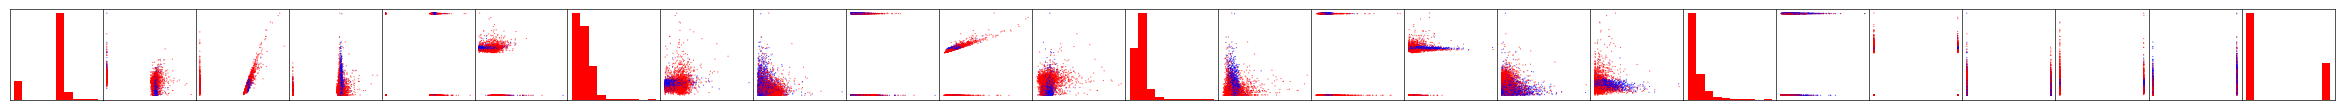

In [15]:
plt.figure(figsize=(60, 60), dpi=60, facecolor='w', edgecolor='k')

index_scatter = 1
colors = ["red", "blue"]
len_scatter = np.shape(tx_train_batch)[1]


for xfeature in range(len_scatter-25):

    print(xfeature)

    for yfeature in range(len_scatter-25):
        print(yfeature, end=" ")
        plt.subplot(len_scatter, len_scatter, index_scatter)
        if xfeature != yfeature :
            plt.scatter(tx_train_batch[:, xfeature], tx_train_batch[:, yfeature], s=0.1, c=y_train_batch, cmap=matplotlib.colors.ListedColormap(colors))
        else:
            plt.hist(tx_train_batch[:, xfeature], color="red")
        
        plt.xticks(())
        plt.yticks(())
        index_scatter += 1
        
        plt.hist

    print("\n")

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Machine Learning Techniques Testing

In [ ]:
# Splitting the training dataset
ratio = 0.7
seed = 4
trainX, testX, trainY, testY = split_data(tx, y, ratio, seed)

### Ridge Regression

In [ ]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)

    trainX, testX, trainY, testY = split_data(x, y, ratio, seed)

    train_matrix = build_poly(trainX, degree)
    test_matrix = build_poly(testX, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):

        w, _ = ridge_regression(trainY, train_matrix, lambda_)
        train_pred = train_matrix.dot(w)
        test_pred = test_matrix.dot(w)
        
        train_error = train_pred - trainY
        test_error = test_pred - testY
        
        rmse_tr.append(math.sqrt(2*(train_error**2).mean()))
        rmse_te.append(math.sqrt(2*(test_error**2).mean()))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

In [ ]:
# For the moment, we separate our dataset between a training and a testing set. To Delete later
ratio = 0.7

seed = 56
degree = 3
split_ratio = 0.7
ridge_regression_demo(tx, y, degree, split_ratio, seed)

### Least Squares

In [ ]:
w, mse = least_squares(y, tx)

### Least Squares SGD

In [ ]:
initial_w = np.zeros(30)
max_iters = 50
gamma = 0.5
w, loss = least_squares_SGD(y, tx, initial_w, max_iters, gamma)

## Results preparation

### Ridge Regression

In [ ]:
def ridge_regression_final(trainX, trainY, testX, degree, lambda_):
    """ridge regression demo."""

    train_matrix = build_poly(trainX, degree)
    test_matrix = build_poly(testX, degree)

    w, _ = ridge_regression(trainY, train_matrix, lambda_)
    print w
    y_pred = predict_labels(w, testX)
    return y_pred

In [ ]:
# Visualizations
degree = 7
lambda_ = 0.1

train_matrix = build_poly(tx.T, degree)
test_matrix = build_poly(tX_test.T, degree)

w, _ = ridge_regression(y, train_matrix, lambda_)
w.shape
y_pred = predict_labels(w, tX_test.T)

In [ ]:
train_matrix.shape

### Least Square

In [ ]:
w, mse = least_squares(y, tx)
y_pred = predict_labels(w,tX_test)

### Results CSV

In [ ]:
# Prepare final csv file with results
name = 'Predicteur'

create_csv_submission(ids_test, y_pred, name)